# Imports

In [2]:
import os
import sys
import pandas as pd

# AI content (GitHub Copilot, 02/07/2024), verified and adapted by Nicolas Huber.
src_directory: str = os.path.join(os.getcwd(), "..")
sys.path.append(src_directory)

from helpers import data_analyzer as data_analyzer
from algorithms import angle_analyzer as angle_analyzer
from helpers import data_visualizer as data_visualizer
from helpers import optimize_thresholds as optimizer
import constants as constants

# Variables

In [3]:
CSV_FILE = "/Users/nicolas/Downloads/test_angle_analyzer.csv"

# Conditions

In [4]:
print("The automated threshold optimizer is executed for the following configuration:")
print(f"--> CSV file: {CSV_FILE}")
print(f"--> Runtime estimation: {constants.OPTIMIZATION_RUNTIME_ESTIMATION} seconds per iteration")
print(f"--> Optimization limit: {constants.OPTIMIZATION_LIMIT}")
print(f"--> Optimization step size: {constants.OPTIMIZATION_STEPS}")

The automated threshold optimizer is executed for the following configuration:
--> CSV file: /Users/nicolas/Downloads/test_angle_analyzer.csv
--> Runtime estimation: 12 seconds per iteration
--> Optimization limit: 100
--> Optimization step size: 5


# Initialisation

In [5]:
Optimizer: optimizer.ThresholdOptimizer = optimizer.ThresholdOptimizer(
    CSV_FILE,
    constants.R_VALUE_WEIGHT,
    constants.P_VALUE_WEIGHT,
    constants.STD_ERROR_WEIGHT,
    constants.OPTIMIZATION_LIMIT,
    constants.OPTIMIZATION_STEPS,
    constants.OPTIMIZATION_RUNTIME_ESTIMATION
)
AngleAnalyzer: angle_analyzer.AngleAnalyzer = angle_analyzer.AngleAnalyzer(
    CSV_FILE,
    constants.ANGLE_PAST_THRESHOLD,
    constants.ANGLE_FUTURE_THRESHOLD,
    constants.ANGLE_THRESHOLD,
    constants.LINEAR_REGRESSION_THRESHOLD,
)
DataAnalyzer: data_analyzer.DataAnalyzer = Optimizer.construct_data_analyzer()
Visualizer: data_visualizer.DataVisualizer = data_visualizer.DataVisualizer()

# Data Import

In [6]:
data: pd.DataFrame = AngleAnalyzer.read_csv_file()

# Optimization

In [7]:
optimization = Optimizer.optimize_thresholds(data, DataAnalyzer, AngleAnalyzer)
Optimizer.export_to_csv(optimization)
optimized_index: int = Optimizer.calculate_optimized_data_loss(optimization)

Total iterations: 324
--> Expected duration (initial estimation of runtime per iteration is 12 seconds): 3888 seconds, 64.8 minutes, 1.08 hours. Estimated time finished: 2024-02-10 13:30:53.
--> Testing thresholds...
----> Iteration 1 of 324, testing thresholds: 10 & 10, estimated time remaining: 3888 seconds, 64.8 minutes, 1.08 hours. Estimated time finished: 2024-02-10 13:30:53.
----> Iteration 2 of 324, testing thresholds: 10 & 15, estimated time remaining: 3926.31 seconds, 65.44 minutes, 1.09 hours. Estimated time finished: 2024-02-10 13:31:43.
----> Iteration 3 of 324, testing thresholds: 10 & 20, estimated time remaining: 3753.91 seconds, 62.57 minutes, 1.04 hours. Estimated time finished: 2024-02-10 13:29:03.
----> Iteration 4 of 324, testing thresholds: 10 & 25, estimated time remaining: 4041.46 seconds, 67.36 minutes, 1.12 hours. Estimated time finished: 2024-02-10 13:34:03.
----> Iteration 5 of 324, testing thresholds: 10 & 30, estimated time remaining: 3837.38 seconds, 63.96

# Dataset

Ordered in descending order by score.

In [8]:
optimization

,angle_past_threshold,angle_future_threshold,average_r_value,average_p_value,average_std_err,score,data_loss
0,80,35,0.720103,6.340885e-16,0.013289,0.430733,73.378661
1,75,35,0.718645,7.155428e-16,0.013293,0.429858,72.646444
2,80,40,0.718274,6.763603e-18,0.012887,0.429676,73.953975
3,80,30,0.718194,8.325111e-14,0.013771,0.429539,72.751046
4,75,40,0.717981,6.593545e-18,0.012856,0.429503,73.300209
...,...,...,...,...,...,...,...
319,15,15,0.559061,8.408242e-08,0.026351,0.332802,54.707113
320,10,20,0.545136,4.021174e-06,0.027522,0.324329,54.811715
321,15,10,0.544917,3.603709e-06,0.030476,0.323901,53.373431
322,10,15,0.536681,3.320294e-06,0.029667,0.319041,52.876569


# Visualisation

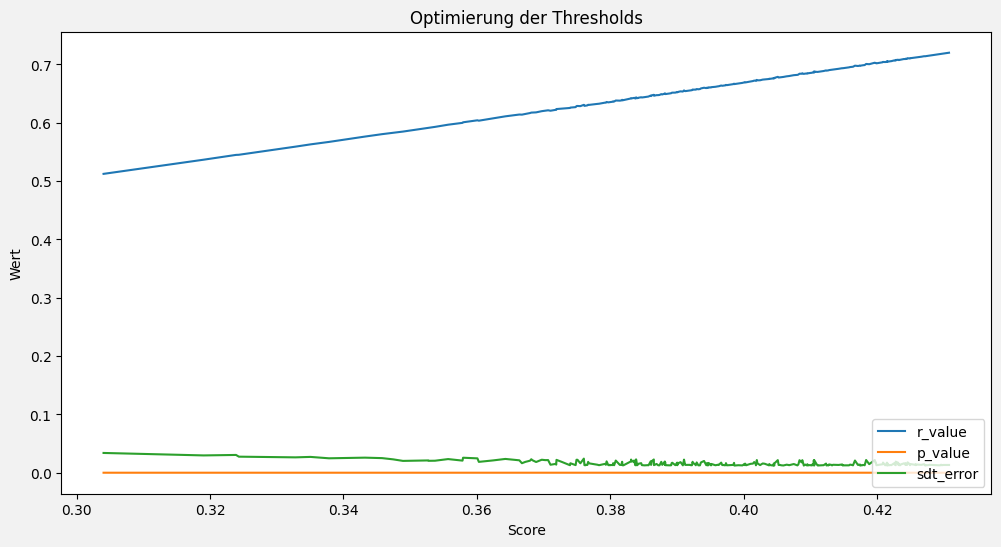

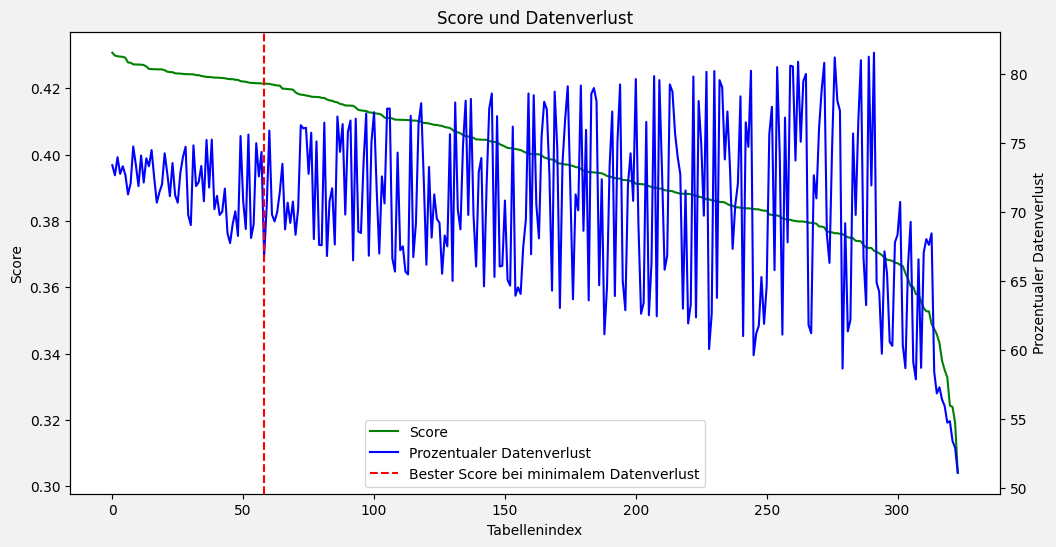

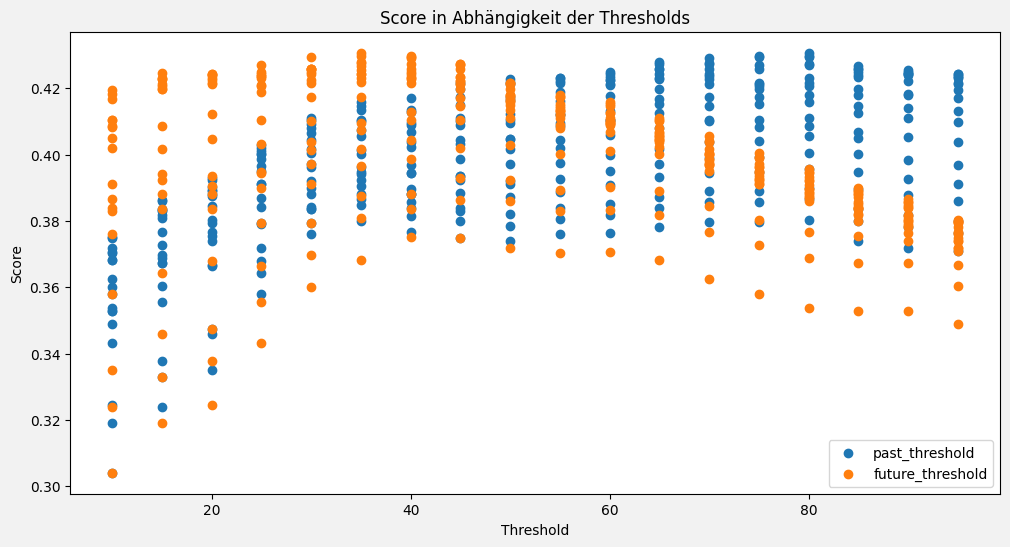

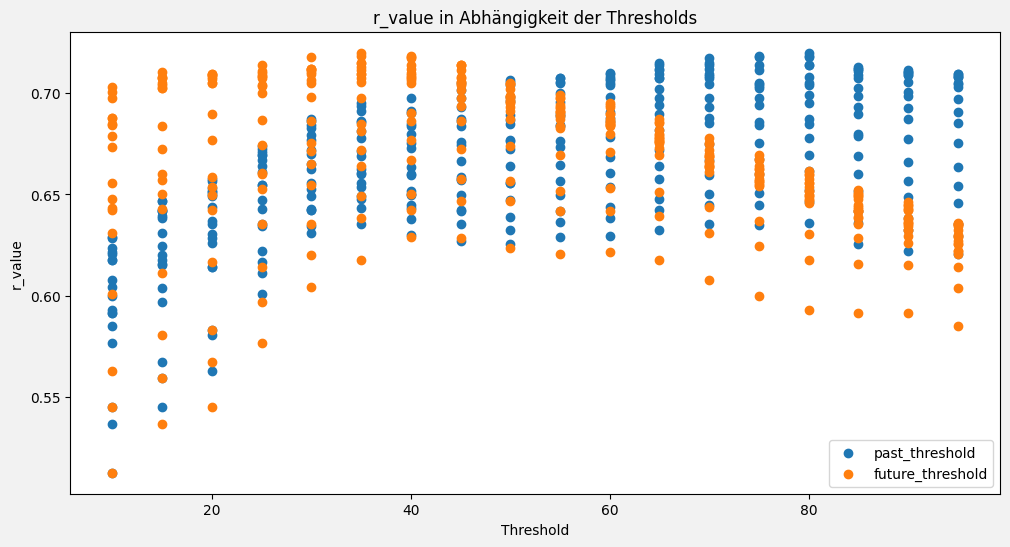

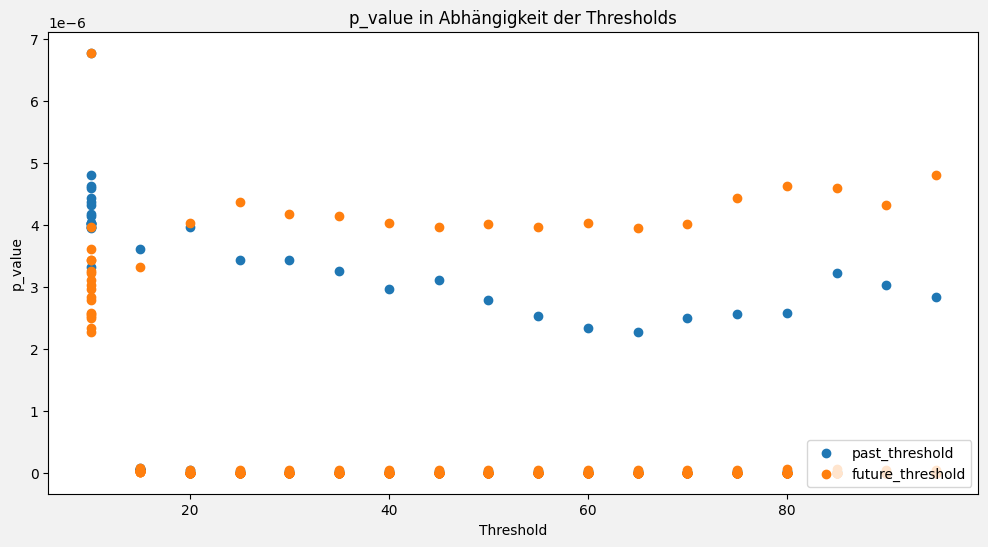

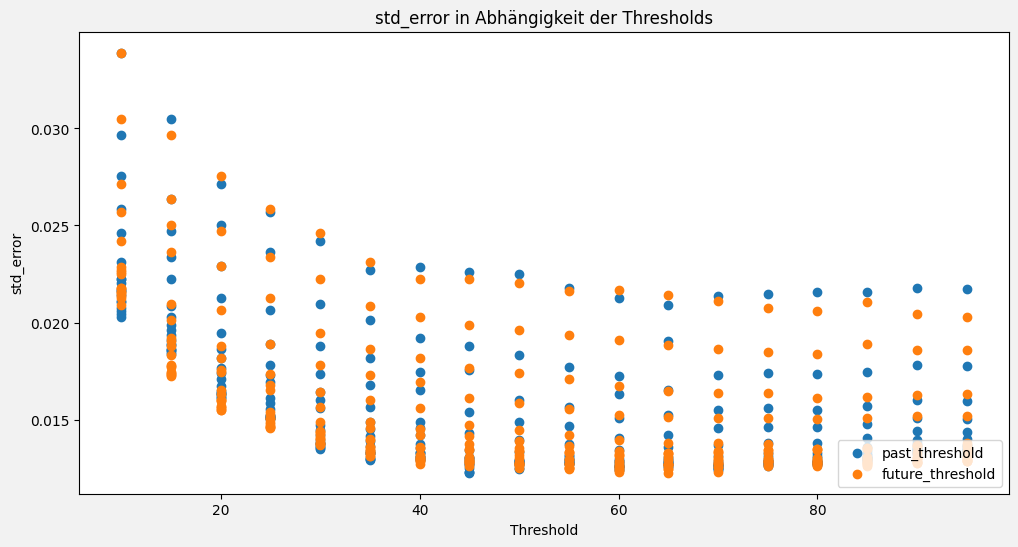

In [9]:
Visualizer.visualize_optimization_linear_regression(optimization)
Visualizer.visualize_score_by_data_loss(optimization, optimized_index)
Visualizer.visualize_optimization_score(optimization)
Visualizer.visualize_optimization_rvalues(optimization)
Visualizer.visualize_optimization_pvalues(optimization)
Visualizer.visualize_optimization_stderrs(optimization)

# Report

In [10]:
print("Individual thresholds with the best score:")
print(f"--> past_threshold_optimized: {Optimizer.past_threshold_optimized}")
print(f"--> future_threshold_optimized: {Optimizer.future_threshold_optimized}")
print()

print("Below is a tabular overview of the 5 best scores and their thresholds. This information is more meaningful here, as in the analysis later for the evaluation of a point, both the future and the past are taken into account, and thus the score considers the interaction of the two thresholds.")

Individual thresholds with the best score:
--> past_threshold_optimized: 80
--> future_threshold_optimized: 35

Below is a tabular overview of the 5 best scores and their thresholds. This information is more meaningful here, as in the analysis later for the evaluation of a point, both the future and the past are taken into account, and thus the score considers the interaction of the two thresholds.


In [11]:
Optimizer.best_scores

,angle_past_threshold,angle_future_threshold,average_r_value,average_p_value,average_std_err,score,data_loss
0,80,35,0.720103,6.340885e-16,0.013289,0.430733,73.378661
1,75,35,0.718645,7.155428e-16,0.013293,0.429858,72.646444
2,80,40,0.718274,6.763603e-18,0.012887,0.429676,73.953975
3,80,30,0.718194,8.325111e-14,0.013771,0.429539,72.751046
4,75,40,0.717981,6.593545e-18,0.012856,0.429503,73.300209


In [12]:
print(f"The best performing thresholds are {Optimizer.best_scores.iloc[0, 0]} (angle_past_threshold) and {Optimizer.best_scores.iloc[0, 1]} (angle_future_threshold) with a score of {Optimizer.best_scores.iloc[0, 5]}.")
print()
print(f"Another good performing set of thresholds can be found by comparing the data loss relative to the scores, which are directly related to the thresholds. In this case, the best performing thresholds are {optimization.iloc[optimized_index, 0]} (angle_past_threshold) and {optimization.iloc[optimized_index, 1]} (angle_future_threshold) with a score of {optimization.iloc[optimized_index, 5]} and a data loss of {optimization.iloc[optimized_index, 6]}. The bigger the difference between the score and the data loss, the better the thresholds are. This is the case because the precison of the thresholds is overall better if less data is lost, even if there is a small decrease in the score.")

The best performing thresholds are 80 (angle_past_threshold) and 35 (angle_future_threshold) with a score of 0.4307330762783574.

Another good performing set of thresholds can be found by comparing the data loss relative to the scores, which are directly related to the thresholds. In this case, the best performing thresholds are 60 (angle_past_threshold) and 15 (angle_future_threshold) with a score of 0.4214311917991185 and a data loss of 66.73640167364016. The bigger the difference between the score and the data loss, the better the thresholds are. This is the case because the precison of the thresholds is overall better if less data is lost, even if there is a small decrease in the score.


# System Info

In [13]:
print(f"@ Version {constants.VERSION}")
print(f"@ Author {constants.AUTHOR}")
print(f"@ Author Email {constants.AUTHOR_EMAIL}")
print(f"@ Author URL {constants.AUTHOR_URL}")
print(f"@ GitHub URL {constants.GITHUB_URL}")

@ Version 0.1.0
@ Author Nicolas Huber
@ Author Email info@nicolas-huber.ch
@ Author URL https://nicolas-huber.ch
@ GitHub URL https://github.com/nicolashuberIT/flight-analyzer
